# 2. Logistic regression with different coding schemes

In [1]:
setwd("/Users/folder_name")

In [21]:
# look at the coding default in R and change it
getOption("contrasts") # check the default coding

unordered           ordered 
"contr.treatment"      "contr.poly"

In [3]:
#options(contrasts=c("contr.sum","contr.poly")) # change nominal category default to sum-to-zero constraint
#options()$contrasts

#options(contrasts=c("contr.treatment","contr.poly")) # change it back to treatment
#options()$contrasts

## Example : Lung cancer (Y) and Smoker (X)

In [4]:
# read in the lung cancer data set
lc = read.table("/Users/folder_name/lungcancer.txt",header=T)
lc

,cigarettes,score,cases,controls
1,None,0,7,61
2,< 5,1,55,129
3,5-14,2,489,570
4,15-24,3,475,431
5,25--49,4,293,154
6,50+,5,38,12


In [5]:
is.factor(lc$cigarettes) # is cigarettes a factor?
levels(lc$cigarettes) # check the levels , "< 5" is the reference group

[1] TRUE

[1] "< 5"    "15-24"  "25--49" "5-14"   "50+"    "None"

In [6]:
lc$cigarettes = factor(lc$cigarettes,levels=levels(lc$cigarettes)[c(6,1,4,2,3,5)]) # change the reference group
levels(lc$cigarettes) # check the levels , "None" is the reference group

[1] "None"   "< 5"    "5-14"   "15-24"  "25--49" "50+"

In [7]:
attributes(lc$cigarettes) # what are its attributes

$levels
[1] "None"   "< 5"    "5-14"   "15-24"  "25--49" "50+"   

$class
[1] "factor"

## Fitting linear logitstic model

### 1. ANOVA type 

In [9]:
lc.fit1 = glm(cbind(cases,controls)~cigarettes,data=lc,family=binomial())
summary(lc.fit1)


Call:
glm(formula = cbind(cases, controls) ~ cigarettes, family = binomial(), 
    data = lc)

Deviance Residuals: 
[1]  0  0  0  0  0  0

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -2.1650     0.3991  -5.425 5.79e-08 ***
cigarettes< 5      1.3125     0.4303   3.050  0.00229 ** 
cigarettes5-14     2.0117     0.4038   4.982 6.29e-07 ***
cigarettes15-24    2.2622     0.4046   5.592 2.25e-08 ***
cigarettes25--49   2.8082     0.4113   6.828 8.62e-12 ***
cigarettes50+      3.3176     0.5186   6.398 1.58e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance:  1.4630e+02  on 5  degrees of freedom
Residual deviance: -5.4623e-14  on 0  degrees of freedom
AIC: 46.38

Number of Fisher Scoring iterations: 3


- __intercept__ is the log odds for non-smokers
- __other parameter estimates__ are the __log odds ratios relative to non-smokers__ for the other 5 levels of smoking

In [10]:
summary(lc.fit1)$cov.unscaled

,(Intercept),cigarettes< 5,cigarettes5-14,cigarettes15-24,cigarettes25--49,cigarettes50+
(Intercept),0.1592505,-0.1592505,-0.1592505,-0.1592505,-0.1592505,-0.1592505
cigarettes< 5,-0.1592505,0.1851842,0.1592505,0.1592505,0.1592505,0.1592505
cigarettes5-14,-0.1592505,0.1592505,0.1630499,0.1592505,0.1592505,0.1592505
cigarettes15-24,-0.1592505,0.1592505,0.1592505,0.1636759,0.1592505,0.1592505
cigarettes25--49,-0.1592505,0.1592505,0.1592505,0.1592505,0.1691570,0.1592505
cigarettes50+,-0.1592505,0.1592505,0.1592505,0.1592505,0.1592505,0.2688996


#### $loigt(\hat{\pi_i})$ values

In [12]:
predict(lc.fit1,type="link") # all 6 logits

1           2           3           4           5           6 
-2.16496372 -0.85247922 -0.15327387  0.09720671  0.64322001  1.15267951

#### $\hat{\pi_i}$ values

In [13]:
predict(lc.fit1,type="response") # pi_i for all 6 categories

1         2         3         4         5         6 
0.1029412 0.2989130 0.4617564 0.5242826 0.6554810 0.7600000

#### Change the reference group : None -> 50+ 

In [14]:
lc$cigarettes = factor(lc$cigarettes,levels=rev(levels(lc$cigarettes)))
levels(lc$cigarettes) # check the levels , "50+" is the reference group

[1] "50+"    "25--49" "15-24"  "5-14"   "< 5"    "None"

In [15]:
lc.fit1a = glm(cbind(cases,controls)~cigarettes,data=lc,family=binomial())
summary(lc.fit1a)


Call:
glm(formula = cbind(cases, controls) ~ cigarettes, family = binomial(), 
    data = lc)

Deviance Residuals: 
[1]  0  0  0  0  0  0

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)        1.1527     0.3311   3.481 0.000500 ***
cigarettes25--49  -0.5095     0.3458  -1.473 0.140640    
cigarettes15-24   -1.0555     0.3377  -3.125 0.001778 ** 
cigarettes5-14    -1.3060     0.3368  -3.877 0.000106 ***
cigarettes< 5     -2.0052     0.3682  -5.446 5.16e-08 ***
cigarettesNone    -3.3176     0.5186  -6.398 1.58e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.4630e+02  on 5  degrees of freedom
Residual deviance: 4.9072e-14  on 0  degrees of freedom
AIC: 46.38

Number of Fisher Scoring iterations: 3


- __intercept__ is _log odds for 50+ smokers_
- __other parameter estimates__ are the log odds ratios _relative to non-smokers_ for the other 5 levels of smoking

#### ANOVA scheme : $loigt(\hat{\pi_i})$ values and $\hat{\pi_i}$ values 

In [16]:
predict(lc.fit1a,type="link") # all 6 logits
predict(lc.fit1a,type="response") # pi_i for all 6 categories

1           2           3           4           5           6 
-2.16496372 -0.85247922 -0.15327387  0.09720671  0.64322001  1.15267951

1         2         3         4         5         6 
0.1029412 0.2989130 0.4617564 0.5242826 0.6554810 0.7600000

#### check the levels , "none" is the reference group

In [17]:
lc$cigarettes = factor(lc$cigarettes,levels=rev(levels(lc$cigarettes))) # change the levels back 
levels(lc$cigarettes)

[1] "None"   "< 5"    "5-14"   "15-24"  "25--49" "50+"

### 2. Dummy variable (Contrast : Sum-to-Zero)

In [26]:
getOption("contrasts")  # contrast option in global environment check 

lc$cigarettes = C(lc$cigarettes,contr=contr.sum) # change coding to sum-to-zero in this specific dataset
lc$cigarettes

unordered           ordered 
"contr.treatment"      "contr.poly"

[1] None   < 5    5-14   15-24  25--49 50+   
attr(,"contrasts")
       [,1] [,2] [,3] [,4] [,5]
None      1    0    0    0    0
< 5       0    1    0    0    0
5-14      0    0    1    0    0
15-24     0    0    0    1    0
25--49    0    0    0    0    1
50+      -1   -1   -1   -1   -1
Levels: None < 5 5-14 15-24 25--49 50+

#### 2.1. Contrast matrix

In [27]:
attributes(lc$cigarettes) # want to see the dummy variable matrix?

None,1,0,0,0,0
< 5,0,1,0,0,0
5-14,0,0,1,0,0
15-24,0,0,0,1,0
25--49,0,0,0,0,1
50+,-1,-1,-1,-1,-1


#### 2.2. Fitting logistic linear model with sum-to-zero constraint

In [29]:
lc.fit2 = glm(cbind(cases,controls)~cigarettes,data=lc,family=binomial())
summary(lc.fit2) # parameter estimates change


Call:
glm(formula = cbind(cases, controls) ~ cigarettes, family = binomial(), 
    data = lc)

Deviance Residuals: 
[1]  0  0  0  0  0  0

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.21294    0.09324  -2.284  0.02239 *  
cigarettes1 -1.95203    0.33891  -5.760 8.43e-09 ***
cigarettes2 -0.63954    0.16119  -3.968 7.26e-05 ***
cigarettes3  0.05966    0.10595   0.563  0.57338    
cigarettes4  0.31014    0.10791   2.874  0.00405 ** 
cigarettes5  0.85616    0.12368   6.922 4.45e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.4630e+02  on 5  degrees of freedom
Residual deviance: 5.1292e-14  on 0  degrees of freedom
AIC: 46.38

Number of Fisher Scoring iterations: 3


#### 2.3. Dummy variable coding (sum-to-zero constraint) : $loigt(\hat{\pi_i})$ values and $\hat{\pi_i}$ values 

In [30]:
predict(lc.fit2,type="link") # all 6 logits (and are the same as for lc.fit1)
predict(lc.fit2,type="response") # pi_i for all 6 categories

1           2           3           4           5           6 
-2.16496372 -0.85247922 -0.15327387  0.09720671  0.64322001  1.15267951

1         2         3         4         5         6 
0.1029412 0.2989130 0.4617564 0.5242826 0.6554810 0.7600000

#### 2.4. Comparison of log OR in different coding schemes
- log(OR) should be the same regardless of coding schemes

##### 2.4.1. ANOVA type coding (ref : None)

In [31]:
# ANOVA type coding (ref : None)
logits = predict(lc.fit1,type="link")

# log odds ratios for levels 2 through 6 relative to 1 compare with the parameter estimates from "lc.fit1"
logits[2:6]-logits[1] 

2        3        4        5        6 
1.312484 2.011690 2.262170 2.808184 3.317643

- For each row $i>2$, it means $log(OR)$ of $Y$ between level $i$ and level 1.
- lc.fit1 : reference group is None.

##### 2.4.2. ANOVA type coding (ref : 50+)

In [34]:
# ANOVA type coding (ref : 50+)
logits = predict(lc.fit1a,type="link")

# log odds ratios for levels 2 through 6 relative to 1 compare with the parameter estimates from "lc.fit1a"
logits[2:6]-logits[1] 

2        3        4        5        6 
1.312484 2.011690 2.262170 2.808184 3.317643

- For each row $i>2$, it means $log(OR)$ of $Y$ between level $i$ and level 1.
- lc.fitla : reference group is 50+.

##### 2.4.3. dummy variable coding (sum-to-zero constraint)

In [35]:
# dummy variable coding (sum-to-zero constraint)
logits = predict(lc.fit2,type="link")

# log odds ratios for levels 2 through 6 relative to 1 compare with the parameter estimates from "lc.fit2"
logits[2:6]-logits[1] 

2        3        4        5        6 
1.312484 2.011690 2.262170 2.808184 3.317643

In [37]:
#alternatively, instead of using 'C" to change the contrast coding, one can use the 'contrasts' argument to the 'glm' function

# ANOVA coding
fit1 = glm(cbind(cases,controls)~cigarettes,data=lc,family=binomial(),contrasts=list(cigarettes="contr.treatment"))  

# sum to zero contrast
fit2 = glm(cbind(cases,controls)~cigarettes,data=lc,family=binomial(),contrasts=list(cigarettes="contr.sum"))  

# helmert contrast
fit3 = glm(cbind(cases,controls)~cigarettes,data=lc,family=binomial(),contrasts=list(cigarettes="contr.helmert")) 

# check the contrasts used by 'glm'
fit1$contrasts 
fit2$contrasts
fit3$contrasts

$cigarettes
[1] "contr.treatment"

$cigarettes
[1] "contr.sum"

$cigarettes
[1] "contr.helmert"

### 3. Ordered factors

- the number of cigarettes is actually ordinal variable

1. Score the levels 
    - 0,1,2,3,4,5 
    - it will be treated as continuous predictor

2. Use mid-range levels 
    - 0, 2.5, 9.5, 19.5, 37, 60

- For ordinal variable, R default is __orthogonal poly__ to model __ordinal predictors__. 


In [40]:
# Ordered factors
lc$cigarettes = as.ordered(C(lc$cigarettes,contr=contr.poly)) # now an ordinal variable with scores = 1,2,3,4,5,6

#### 3.1. Fitting logit linear model with ordinal factor

__Ordinal factors in logit model__

$logit(\pi_{ik}) = \alpha + \beta_{1}x_{i1} + \beta_{2}x_{i2}^2 + \beta_{3}x_{i3}^2 +...+ \beta_{I-1}x_{iI-1}^{I-1}$

##### 3.1.1 Scoring the levels 

In [41]:
lc.fit3 = glm(cbind(cases,controls)~cigarettes,data=lc,family=binomial()) # fit the model
summary(lc.fit3) 


Call:
glm(formula = cbind(cases, controls) ~ cigarettes, family = binomial(), 
    data = lc)

Deviance Residuals: 
[1]  0  0  0  0  0  0

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.21294    0.09324  -2.284   0.0224 *  
cigarettes.L  2.54892    0.31743   8.030 9.76e-16 ***
cigarettes.Q -0.50494    0.28640  -1.763   0.0779 .  
cigarettes.C  0.38135    0.21871   1.744   0.0812 .  
cigarettes^4 -0.09386    0.14933  -0.629   0.5297    
cigarettes^5 -0.10432    0.08881  -1.175   0.2401    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.4630e+02  on 5  degrees of freedom
Residual deviance: 8.6597e-15  on 0  degrees of freedom
AIC: 46.38

Number of Fisher Scoring iterations: 3


- cigarettes.L = linear term $x_{i1}$
- cigarettes.Q = quadratic term $x_{i2}^2$
- cigarettes.C = cubic term $x_{i3}^3$
- cigarettes^4 = 4th order term $x_{i4}^4$
- cigarettes^5 = 5th order term $x_{i5}^5$

##### 1st degree polynomial

In [42]:
# specifies a 1st degree polynomial 
lc$cigarettes = as.ordered(C(lc$cigarettes,contr=contr.poly,how.many=1)) 

lc.fit4 = glm(cbind(cases,controls)~cigarettes,data=lc,family=binomial()) # fit the model
summary(lc.fit4) # equivalent to the linear logit model


Call:
glm(formula = cbind(cases, controls) ~ cigarettes, family = binomial(), 
    data = lc)

Deviance Residuals: 
       1         2         3         4         5         6  
-2.69342  -0.65142   2.06914  -1.33595  -0.10204   0.09713  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.04745    0.03958  -1.199    0.231    
cigarettes.L  1.95453    0.17618  11.094   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.299  on 5  degrees of freedom
Residual deviance:  13.765  on 4  degrees of freedom
AIC: 52.145

Number of Fisher Scoring iterations: 4


##### 3.1.2 Using mid-range levels

In [43]:
lc$cigarettes = as.ordered(C(lc$cigarettes,contr=contr.poly,scores=c(0,2.5,9.5,19.5,37,60))) # scoring by the medians

lc.fit5 = glm(cbind(cases,controls)~cigarettes,data=lc,family=binomial()) # fit the model
summary(lc.fit5) # estimates of course change


Call:
glm(formula = cbind(cases, controls) ~ cigarettes, family = binomial(), 
    data = lc)

Deviance Residuals: 
[1]  0  0  0  0  0  0

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.21294    0.09324  -2.284 0.022386 *  
cigarettes.L  2.28571    0.30374   7.525 5.26e-14 ***
cigarettes.Q -0.88846    0.24220  -3.668 0.000244 ***
cigarettes.C  0.65391    0.18396   3.555 0.000379 ***
cigarettes^4 -0.58526    0.17755  -3.296 0.000980 ***
cigarettes^5  0.36490    0.21100   1.729 0.083735 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance:  1.4630e+02  on 5  degrees of freedom
Residual deviance: -5.4623e-14  on 0  degrees of freedom
AIC: 46.38

Number of Fisher Scoring iterations: 3


In [45]:
# remove the 5 degree term which was not significant
lc$cigarettes = as.ordered(C(lc$cigarettes,contr=contr.poly,scores=c(0,2.5,9.5,19.5,37,60),how.many=4)) 

lc.fit6 = glm(cbind(cases,controls)~cigarettes,data=lc,family=binomial()) # fit the model
summary(lc.fit6) # estimates of course change


Call:
glm(formula = cbind(cases, controls) ~ cigarettes, family = binomial(), 
    data = lc)

Deviance Residuals: 
       1         2         3         4         5         6  
-1.36963   1.12839  -0.26875   0.11404  -0.02838   0.00822  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.15695    0.08256  -1.901 0.057289 .  
cigarettes.L  2.13728    0.28267   7.561    4e-14 ***
cigarettes.Q -0.72644    0.21268  -3.416 0.000636 ***
cigarettes.C  0.46600    0.13567   3.435 0.000593 ***
cigarettes^4 -0.34096    0.09383  -3.634 0.000279 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.2991  on 5  degrees of freedom
Residual deviance:   3.2352  on 1  degrees of freedom
AIC: 47.615

Number of Fisher Scoring iterations: 4


In [46]:
sample.prop = lc$cases/(lc$cases+lc$controls) # sample proportions of lung cancer cases
fitted = predict(lc.fit6,type="response")

sample.prop
fitted

[1] 0.1029412 0.2989130 0.4617564 0.5242826 0.6554810 0.7600000

1         2         3         4         5         6 
0.1605578 0.2618180 0.4658751 0.5223902 0.6561188 0.7595036

##### Plot for mid-range vs. $\hat{\pi}_{i}$ for $i=0,1,2,3,4,5$

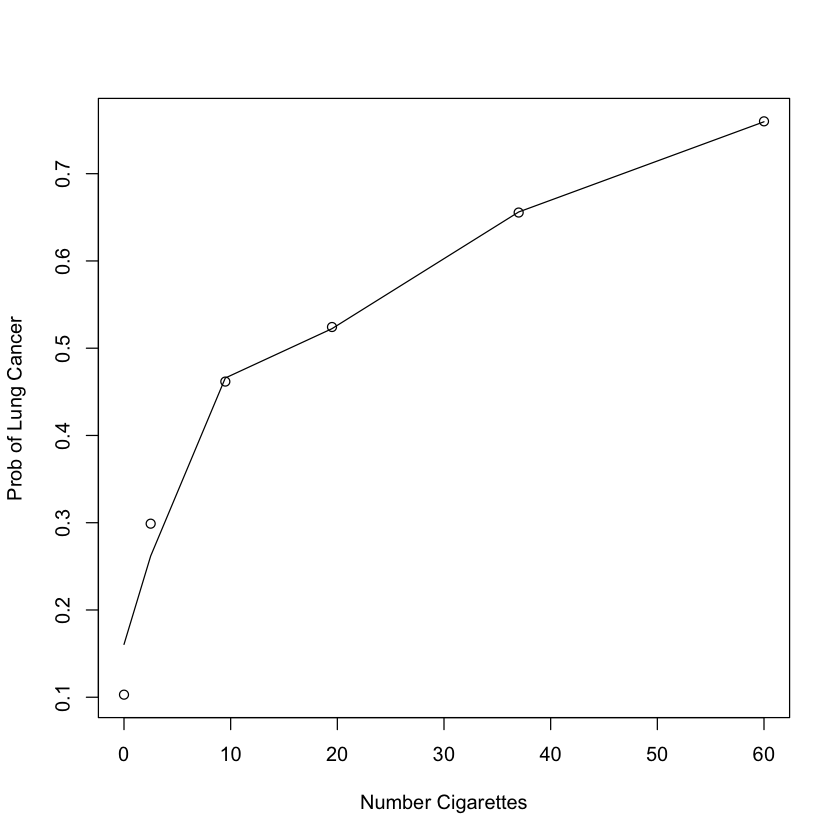

In [47]:
plot(c(0,2.5,9.5,19.5,37,60),sample.prop,xlab="Number Cigarettes",ylab="Prob of Lung Cancer")
lines(c(0,2.5,9.5,19.5,37,60),fitted)